In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fs = 800
t = 5
t = np.linspace(0, t, fs*t+1)

In [3]:
A = 325
f = 50
y = A*np.sin(2*f*np.pi*t)

In [4]:
yrms = np.sqrt(np.mean(y**2))
yrms

229.78098305768538

In [5]:
Y = 2*np.fft.rfft(y)/y.size

In [6]:
np.isclose(Y[0], 0)

True

In [7]:
Yrms = np.sqrt(np.real(Y[0]**2 + np.sum(Y[1:]*np.conj(Y[1:]))/2))
Yrms

229.78098305768538

In [8]:
import pandas as pd

In [9]:
def rms(y):
    Y = 2*np.fft.rfft(y)/y.size
    return np.sqrt(np.real(Y[0]**2 + np.sum(Y[1:]*np.conj(Y[1:]))/2))

In [10]:
y = np.exp(-0.1*t)*A*np.sin(2*f*np.pi*t)

In [11]:
df = pd.DataFrame(y, index=t*pd.Timedelta('1s'), columns=['signal'])
df['rms'] = df.rolling(int(fs/f)).agg(rms)

In [12]:
r = df['signal'].resample('1s').agg(rms)

In [13]:
print(df[10:16])

                     signal         rms
00:00:00.012500 -229.522621         NaN
00:00:00.013750 -299.848273         NaN
00:00:00.015000 -324.512865         NaN
00:00:00.016250 -299.773320         NaN
00:00:00.017500 -229.407889         NaN
00:00:00.018750 -124.139136  229.580142


In [14]:
y = np.exp(-0.1*t)*A*(np.sin(2*f*np.pi*t) + 0.2*np.sin(8*f*np.pi*t) + 0.1*np.sin(16*f*np.pi*t))

In [15]:
from scipy import signal

In [16]:
filt = signal.butter(3, [40,60], btype='bandpass', fs=fs, output='sos')

In [17]:
yfilt = signal.sosfilt(filt, y)

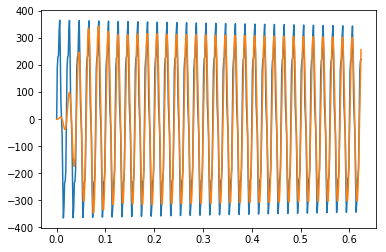

In [18]:
fig, axe = plt.subplots()
q = slice(0,500)
axe.plot(t[q], y[q])
axe.plot(t[q], yfilt[q])

In [19]:
yfilt

array([ 0.00000000e+00,  7.88723639e-02,  5.11325761e-01, ...,
       -1.63779250e+02, -1.08821940e+02, -3.73208168e+01])

In [20]:
yfilt.size

4001

In [21]:
from scipy import fftpack

In [22]:
w = fftpack.fftfreq(y.size, d=1/fs)
w

array([ 0.        ,  0.19995001,  0.39990002, ..., -0.59985004,
       -0.39990002, -0.19995001])

In [23]:
q = np.abs(w-50)<0.5

In [24]:
w[q]

array([49.5876031 , 49.78755311, 49.98750312, 50.18745314, 50.38740315])

In [25]:
Y = fftpack.rfft(y)
Y

array([ 3.34229613e+02,  3.34235469e+02, -8.09936156e-01, ...,
        9.25928285e-02, -1.04140566e+02,  3.08642536e-02])

In [26]:
Y[~q]=0

In [27]:
np.sqrt(np.sum(Y[q]**2)/2)

485.6144203753939

In [28]:
yf = fftpack.irfft(Y)

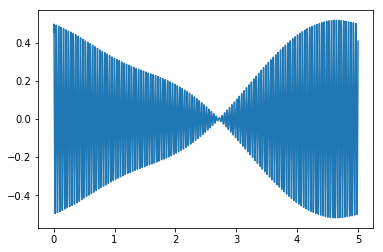

In [29]:
plt.plot(t, yf)